In [1]:
import pandas as pd
import numpy as np

delivery_duration_time = pd.read_excel('/kaggle/input/delivery/historical_data.xlsx')

In [2]:
delivery_duration_time.head(5)

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [3]:
delivery = delivery_duration_time.copy()

In [4]:
delivery.shape

(197428, 16)

In [5]:
delivery.describe()

market_id                     created_at  \
count  196441.000000                         197428   
mean        2.978706  2015-02-04 22:00:09.537962752   
min         1.000000            2014-10-19 05:24:15   
25%         2.000000            2015-01-29 02:32:42   
50%         3.000000     2015-02-05 03:29:09.500000   
75%         4.000000     2015-02-12 01:39:18.500000   
max         6.000000            2015-02-18 06:00:44   
std         1.524867                            NaN   

                actual_delivery_time       store_id  order_protocol  \
count                         197421  197428.000000   196433.000000   
mean   2015-02-04 22:48:23.348914432    3530.510272        2.882352   
min              2015-01-21 15:58:11       1.000000        1.000000   
25%              2015-01-29 03:22:29    1686.000000        1.000000   
50%              2015-02-05 04:40:41    3592.000000        3.000000   
75%              2015-02-12 02:25:26    5299.000000        4.000000   
max              2015-02-19 22:45:31    6987.000000        7.000000   
std                              NaN    2053.496711        1.503771   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  197428.000000  197428.000000       197428.000000   197428.000000   
mean        3.196391    2682.331402            2.670791      686.218470   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1400.000000            1.000000      299.000000   
50%         3.000000    2200.000000            2.000000      595.000000   
75%         4.000000    3395.000000            3.000000      949.000000   
max       411.000000   27100.000000           20.000000    14700.000000   
std         2.666546    1823.093688            1.630255      522.038648   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   197428.000000          181166.000000       181166.000000   
mean      1159.588630              44.808093           41.739747   
min          0.000000              -4.000000           -5.000000   
25%        800.000000              17.000000           15.000000   
50%       1095.000000              37.000000           34.000000   
75%       1395.000000              65.000000           62.000000   
max      14700.000000             171.000000          154.000000   
std        558.411377              34.526783           32.145733   

       total_outstanding_orders  estimated_order_place_duration  \
count             181166.000000                   197428.000000   
mean                  58.050065                      308.560179   
min                   -6.000000                        0.000000   
25%                   17.000000                      251.000000   
50%                   41.000000                      251.000000   
75%                   85.000000                      446.000000   
max                  285.000000                     2715.000000   
std                   52.661830                       90.139653   

       estimated_store_to_consumer_driving_duration  
count                                 196902.000000  
mean                                     545.358935  
min                                        0.000000  
25%                                      382.000000  
50%                                      544.000000  
75%                                      702.000000  
max                                     2088.000000  
std                                      219.352902

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [7]:
delivery["target"]=np.nan


In [8]:
delShape = delivery.shape
delShape

(197428, 17)

In [9]:
nulls = delivery[delivery["actual_delivery_time"].isnull()]
for x in (nulls.index):
    a=delivery["created_at"][x]
    delivery.loc[x, "actual_delivery_time"]=a



In [10]:
delivery[delivery["actual_delivery_time"].isnull()]

Empty DataFrame
Columns: [market_id, created_at, actual_delivery_time, store_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, estimated_order_place_duration, estimated_store_to_consumer_driving_duration, target]
Index: []

In [11]:
delivery['created_at'][0]

Timestamp('2015-02-06 22:24:17')

In [12]:
for x in range(delShape[0]):
    time1 = delivery['created_at'][x]
    time2 = delivery['actual_delivery_time'][x]
    delivery.loc[x, 'target'] = ((time2.hour-time1.hour)*3600)+((time2.minute-time1.minute)*60)+(time2.second-time1.second)
                                                                                 

ok!!now we have targets...we can start

oh no...if you look at the delivery.describe you see that we have negative prices in min_item_price!!!!

In [13]:
delivery.describe()

market_id                     created_at  \
count  196441.000000                         197428   
mean        2.978706  2015-02-04 22:00:09.537962752   
min         1.000000            2014-10-19 05:24:15   
25%         2.000000            2015-01-29 02:32:42   
50%         3.000000     2015-02-05 03:29:09.500000   
75%         4.000000     2015-02-12 01:39:18.500000   
max         6.000000            2015-02-18 06:00:44   
std         1.524867                            NaN   

                actual_delivery_time       store_id  order_protocol  \
count                         197428  197428.000000   196433.000000   
mean   2015-02-04 22:48:37.692221952    3530.510272        2.882352   
min              2015-01-21 15:58:11       1.000000        1.000000   
25%       2015-01-29 03:22:34.500000    1686.000000        1.000000   
50%       2015-02-05 04:40:42.500000    3592.000000        3.000000   
75%              2015-02-12 02:25:35    5299.000000        4.000000   
max              2015-02-19 22:45:31    6987.000000        7.000000   
std                              NaN    2053.496711        1.503771   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  197428.000000  197428.000000       197428.000000   197428.000000   
mean        3.196391    2682.331402            2.670791      686.218470   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1400.000000            1.000000      299.000000   
50%         3.000000    2200.000000            2.000000      595.000000   
75%         4.000000    3395.000000            3.000000      949.000000   
max       411.000000   27100.000000           20.000000    14700.000000   
std         2.666546    1823.093688            1.630255      522.038648   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   197428.000000          181166.000000       181166.000000   
mean      1159.588630              44.808093           41.739747   
min          0.000000              -4.000000           -5.000000   
25%        800.000000              17.000000           15.000000   
50%       1095.000000              37.000000           34.000000   
75%       1395.000000              65.000000           62.000000   
max      14700.000000             171.000000          154.000000   
std        558.411377              34.526783           32.145733   

       total_outstanding_orders  estimated_order_place_duration  \
count             181166.000000                   197428.000000   
mean                  58.050065                      308.560179   
min                   -6.000000                        0.000000   
25%                   17.000000                      251.000000   
50%                   41.000000                      251.000000   
75%                   85.000000                      446.000000   
max                  285.000000                     2715.000000   
std                   52.661830                       90.139653   

       estimated_store_to_consumer_driving_duration         target  
count                                 196902.000000  197428.000000  
mean                                     545.358935     253.065821  
min                                        0.000000  -85869.000000  
25%                                      382.000000    2048.000000  
50%                                      544.000000    2622.000000  
75%                                      702.000000    3347.000000  
max                                     2088.000000   73282.000000  
std                                      219.352902   14795.142767

In [14]:
delivery.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  target  
0                                         861.0  3779.0  
1                                         690.0  4024.0  
2                                         690.0  1781.0  
3                                         289.0  3075.0  
4                                         650.0  2390.0

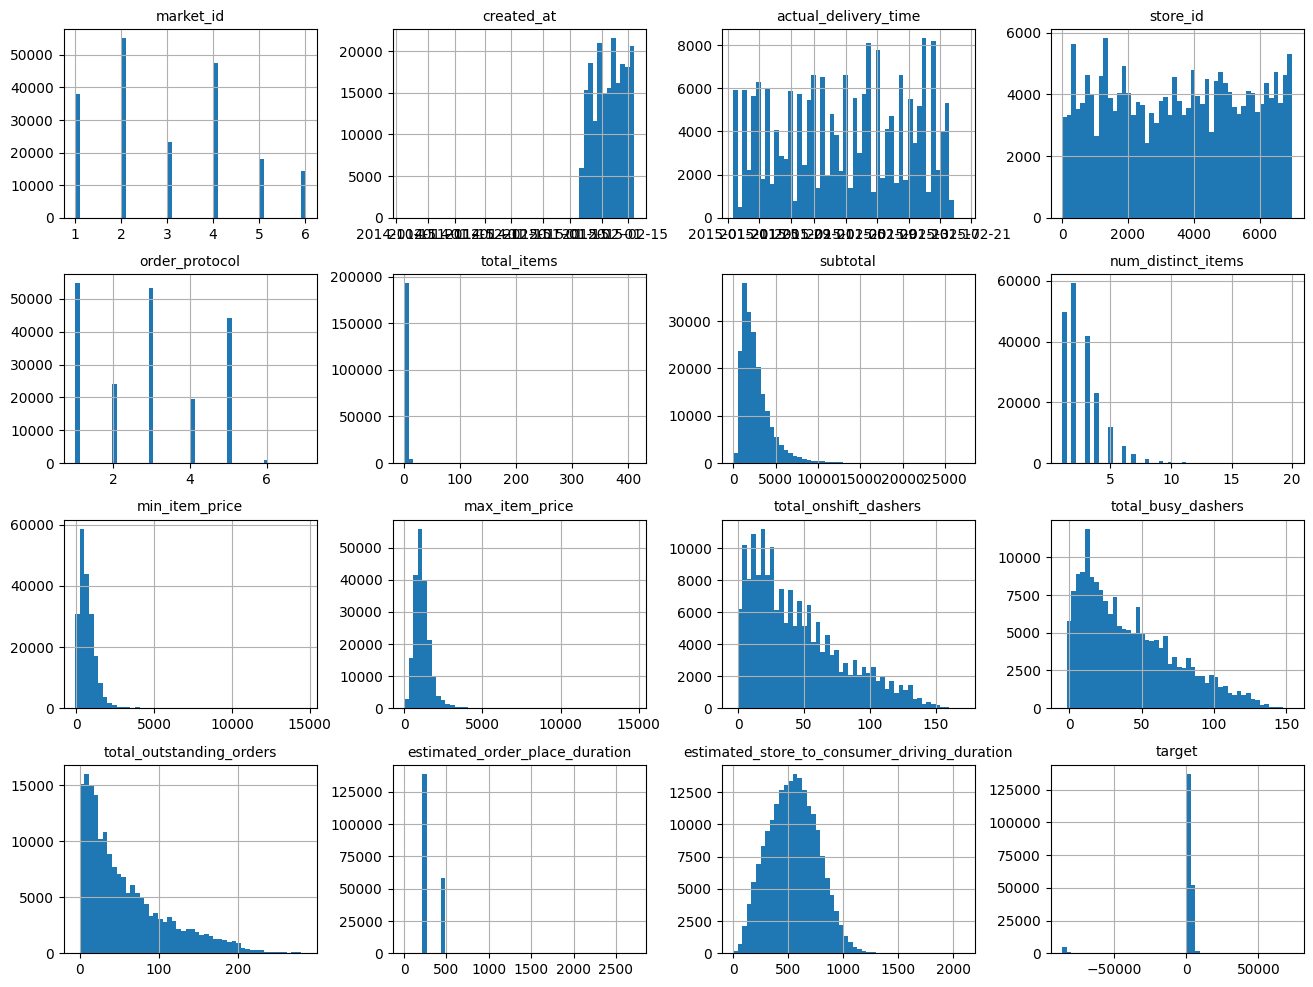

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

delivery.hist(bins=50, figsize=(16, 12))
plt.show()

ooo seems that total_busy_dashers and target have negative values,lets positive them.

In [16]:
delivery.loc[delivery["total_busy_dashers"]<0, "total_busy_dashers"] = -delivery["total_busy_dashers"]
delivery.loc[delivery["min_item_price"]<0, "min_item_price"] = -delivery['min_item_price']


In [17]:
delivery = delivery[delivery['target']>=0]

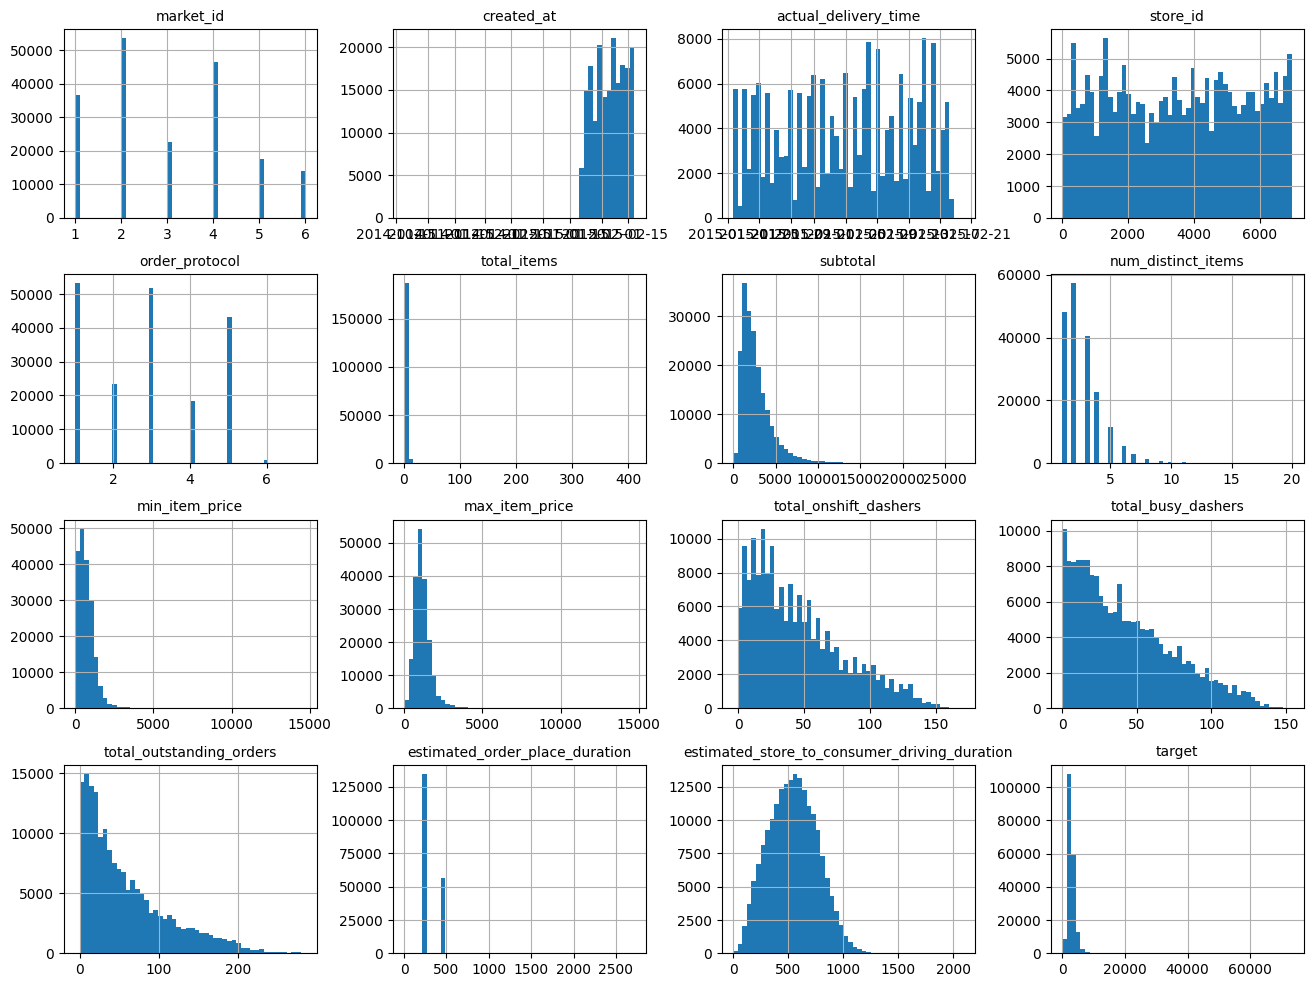

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

delivery.hist(bins=50, figsize=(16, 12))
plt.show()

In [19]:
delivery = delivery.drop('store_primary_category', axis=1)
corr_matrix = delivery.corr()

In [20]:
corr_matrix['target'].sort_values(ascending=False)

target                                          1.000000
estimated_store_to_consumer_driving_duration    0.224189
subtotal                                        0.210868
total_outstanding_orders                        0.185500
num_distinct_items                              0.152983
max_item_price                                  0.130130
total_items                                     0.114644
total_busy_dashers                              0.097040
estimated_order_place_duration                  0.096239
total_onshift_dashers                           0.077287
actual_delivery_time                            0.037812
created_at                                      0.033368
min_item_price                                  0.014693
store_id                                       -0.010681
market_id                                      -0.045586
order_protocol                                 -0.066536
Name: target, dtype: float64

In [21]:
X_set = pd.DataFrame(delivery, columns=['estimated_store_to_consumer_driving_duration', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_items'], index=delivery.index)
y_set = delivery['target'].copy()

In [22]:
X_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191466 entries, 0 to 197427
Data columns (total 5 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   estimated_store_to_consumer_driving_duration  190943 non-null  float64
 1   subtotal                                      191466 non-null  int64  
 2   num_distinct_items                            191466 non-null  int64  
 3   max_item_price                                191466 non-null  int64  
 4   total_items                                   191466 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 8.8 MB


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=42)

In [24]:
X_train.head()

estimated_store_to_consumer_driving_duration  subtotal  \
2410                                           666.0      1854   
68322                                          607.0      2165   
187801                                         432.0      1000   
185615                                         522.0      2295   
34572                                          452.0      4585   

        num_distinct_items  max_item_price  total_items  
2410                     2             900            2  
68322                    3             795            3  
187801                   1            1000            1  
185615                   2            1050            2  
34572                    5            1295            8

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler())
    ])

X_train_tr = num_pipeline.fit_transform(X_train)

lets build model

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_tr, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def pred_and_err(model, X=X_train_tr, y=y_train):
  y_pred = model.predict(X)
  print('squared error is : ', np.sqrt(mean_squared_error(y, y_pred)),'absolute error is : ', mean_absolute_error(y, y_pred))

In [28]:
pred_and_err(lin_reg, X_train_tr, y_train)



squared error is :  1091.7259371510047 absolute error is :  768.0952630481621


In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_tr, y_train)
pred_and_err(tree_reg, X_train_tr, y_train)

squared error is :  188.26017369476503 absolute error is :  25.833713438238735


OOO!!!!Looks great!lets check that again

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_tr, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)

In [31]:
def display_scores(scores):
  print("scores: ",scores)
  print("mean of scores: ", scores.mean())
  print("standard deviation: ", scores.std())

In [32]:
display_scores(tree_rmse_scores)

scores:  [1612.38522826 1609.06611523 1513.04628979 1561.97967669 1612.75595792
 1579.48039595 1545.03924982 1562.91767809 1545.96344565 1541.10952103]
mean of scores:  1568.374355842566
standard deviation:  32.569704230068666


OK...so tree is not so good...

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_tr, y_train)

In [ ]:
pred_and_err(forest_reg, X_train_tr, y_train)

In [ ]:
scores = cross_val_score(forest_reg, X_train_tr, y_train, cv=10, scoring='neg_mean_squared_error')
forest_rmse_error = np.sqrt(-scores)
display_scores(forest_rmse_error)

get much better

In [ ]:
X_test_tr = num_pipeline.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_tr, y_train)
pred_and_err(sgd_reg, X_train_tr, y_train)

In [ ]:
scores = cross_val_score(sgd_reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_error = np.sqrt(-scores)
display_scores(sgd_rmse_error)

In [ ]:
from sklearn.metrics import accuracy_score
for reg in (lin_reg, tree_reg, forest_reg, sgd_reg):
  reg.fit(X_train_tr, y_train)
  y_pred = reg.predict(X_test_tr)
  print(reg.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter':[100, 1000, 5000], 'tol':[1e-3, 1e-2, 1e-4], 'eta0':[.1, .01, .5], 'penalty':[None]}
]
best_sgd_model = GridSearchCV(sgd_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
best_sgd_model.fit(X_train_tr, y_train)

In [ ]:
pred_and_err(best_sgd_model, X_train_tr, y_train)

In [ ]:
scores = cross_val_score(best_sgd_model, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_error = np.sqrt(-scores)
display_scores(sgd_rmse_error)

In [ ]:
y_pred = best_sgd_model.predict(X_test_tr)
print(best_sgd_model.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))

lets merge linearRegression and RandomForest and SGD

In [ ]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(
    estimators=[('lr', lin_reg), ('rf', forest_reg), ('sgd', best_sgd_model)],
    
)

In [ ]:
voting_reg.fit(X_train_tr, y_train)

In [ ]:
pred_and_err(voting_reg, X_train_tr, y_train)

In [ ]:
scores = cross_val_score(voting_reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=10)
voting_rmse_error = np.sqrt(-scores)
display_scores(voting_rmse_error)

In [ ]:
y_pred = voting_reg.predict(X_test_tr)
print(voting_reg.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))